In [41]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
dir(tree)

['BaseDecisionTree',
 'DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_classes',
 '_criterion',
 '_export',
 '_reingold_tilford',
 '_splitter',
 '_tree',
 '_utils',
 'export_graphviz',
 'export_text',
 'plot_tree']

In [14]:
df = pd.read_csv("/home/ayush/Downloads/car_evaluation.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   buying price      1728 non-null   object
 1   maintenance cost  1728 non-null   object
 2   number of doors   1728 non-null   object
 3   number of person  1728 non-null   object
 4   lug_boot          1728 non-null   object
 5   safety            1728 non-null   object
 6   decision          1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [16]:
df.head()

,buying price,maintenance cost,number of doors,number of person,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [17]:
for col in df.columns:
    item_counts = df[col].value_counts()
    print(item_counts)

high     432
low      432
vhigh    432
med      432
Name: buying price, dtype: int64
high     432
low      432
vhigh    432
med      432
Name: maintenance cost, dtype: int64
3        432
4        432
2        432
5more    432
Name: number of doors, dtype: int64
4       576
2       576
more    576
Name: number of person, dtype: int64
small    576
big      576
med      576
Name: lug_boot, dtype: int64
high    576
low     576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64


In [18]:
for col in df.columns:
    print(col, "-->",df[col].isnull().any())

buying price --> False
maintenance cost --> False
number of doors --> False
number of person --> False
lug_boot --> False
safety --> False
decision --> False


In [19]:
x= df.drop(['decision'], axis=1)
y = df['decision']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [23]:
dir(OrdinalEncoder)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_X',
 '_check_n_features',
 '_fit',
 '_get_feature',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_transform',
 '_validate_data',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'set_params',
 'transform']

In [26]:
encoder = OrdinalEncoder()

In [28]:
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [34]:
x_train

array([[3., 3., 1., 2., 1., 1.],
       [0., 3., 1., 1., 2., 1.],
       [3., 0., 1., 2., 2., 0.],
       ...,
       [0., 1., 3., 2., 1., 0.],
       [1., 0., 2., 0., 2., 2.],
       [2., 2., 1., 2., 2., 2.]])

In [35]:
x_test

array([[0., 0., 2., 0., 1., 0.],
       [2., 1., 0., 1., 1., 2.],
       [0., 0., 3., 0., 0., 2.],
       ...,
       [3., 0., 1., 1., 1., 1.],
       [3., 1., 1., 1., 2., 1.],
       [3., 3., 3., 0., 2., 0.]])

In [113]:
model_1 = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
model_1.fit(x_train, y_train)
model_2 = LogisticRegression(random_state=0)
model_2.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [114]:
y_model_1 = model_1.predict(x_test)
y_model_2 = model_2.predict(x_test)

In [115]:
print('Model accuracy score with Decision trees: {0:0.4f}'. format(accuracy_score(y_test, y_model_1)))
print('Model accuracy score with Logistic regression: {0:0.4f}'. format(accuracy_score(y_test, y_model_2)))

Model accuracy score with Decision trees: 0.9615
Model accuracy score with Logistic regression: 0.6673


In [116]:
y_train_1 = model_1.predict(x_train)
y_train_2 = model_2.predict(x_train)

In [117]:
#TO check overfitting
print('Model accuracy score with Decision trees: {0:0.4f}'. format(accuracy_score(y_train, y_train_1)))
print('Model accuracy score with Logistic regression: {0:0.4f}'. format(accuracy_score(y_train, y_train_2)))

Model accuracy score with Decision trees: 0.9931
Model accuracy score with Logistic regression: 0.7070


[Text(364.5267857142857, 415.1127272727273, 'X[3] <= 0.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(353.8982142857143, 375.5781818181818, 'gini = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(375.1553571428571, 375.5781818181818, 'X[5] <= 0.5\ngini = 0.573\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(207.25714285714284, 336.0436363636364, 'X[1] <= 2.5\ngini = 0.634\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(116.91428571428571, 296.5090909090909, 'X[0] <= 0.5\ngini = 0.619\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(31.885714285714286, 256.9745454545455, 'X[2] <= 0.5\ngini = 0.073\nsamples = 53\nvalue = [51, 0, 2, 0]'),
 Text(21.257142857142856, 217.44, 'X[4] <= 1.5\ngini = 0.278\nsamples = 12\nvalue = [10, 0, 2, 0]'),
 Text(10.628571428571428, 177.90545454545457, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0]'),
 Text(31.885714285714286, 177.90545454545457, 'X[3] <= 1.5\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 2, 0]'),
 Text(21.257142

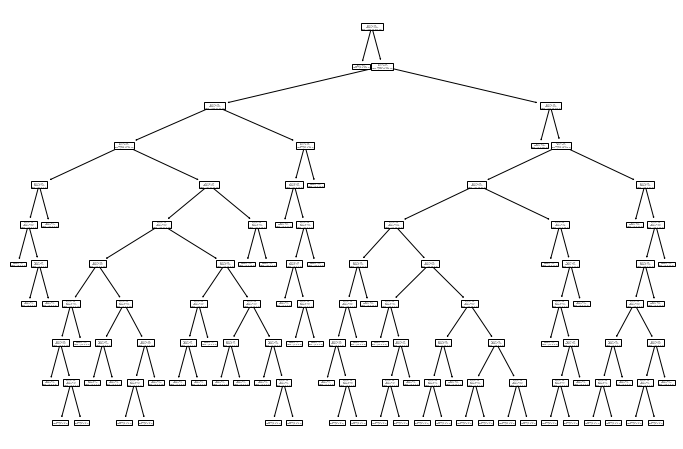

In [118]:
plt.figure(figsize=(12,8))
tree.plot_tree(model_1.fit(x_train, y_train)) 